# Simple RNN (Many-to-one 문제)
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다.
- 참고: https://childult-programmer.tistory.com/54?category=853973
- 활성화함수 관련: https://gooopy.tistory.com/54, https://heeya-stupidbutstudying.tistory.com/38, https://ganghee-lee.tistory.com/32, https://m.blog.naver.com/qbxlvnf11/221901564016
- 삼각함수 관련: https://news.samsungdisplay.com/24578/

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = np.sin(np.arange(21) * np.pi/4.)    # pi / 4는 45도
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

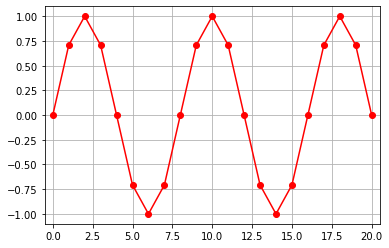

In [7]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.show()

- X_train, y_train 데이터 만들기

In [8]:
X_train = []
y_train = np.empty(len(s) - 3)
for i in range(len(s) - 3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [11]:
X_train = np.array(X_train).reshape(-1,3,1)     
X_train.shape   # 입력 데이터 갯수
                # timesteps(하나의 노드에 3개의 데이터가 하나의 리스트로 들어감): 시퀀스로 보내줄 값
                #   - 다음값의 결과인 y가 나오게 됨
                # input_dim: 1차원
                # (18, 3) --> RNN의 입장에서 timestep과 input_dim을 혼동할 여지가 있다.

(18, 3, 1)

In [12]:
X_train[0]

array([[0.        ],
       [0.70710678],
       [1.        ]])

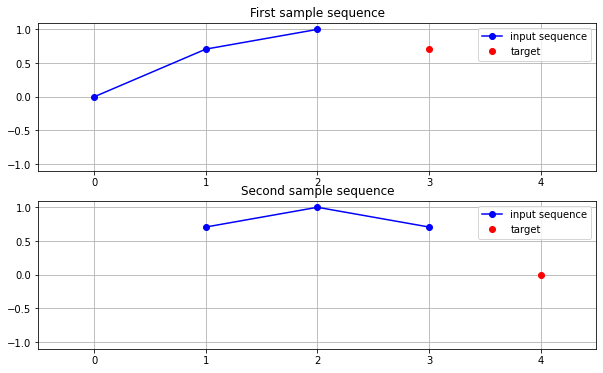

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('First sample sequence')

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], y_train[1], 'ro', label='target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('Second sample sequence')

plt.show()

- 순환 신경망 모델 정의/설정

In [27]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [29]:
np.__version__      # version 1.20.2에서는 아래 모델 정의가 안된다.

'1.19.5'

In [33]:
model = Sequential([ 
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),    # input_shape=(3,1)
    Dense(1, activation='linear')
])
model.summary()     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='mse')

- 모델 학습전

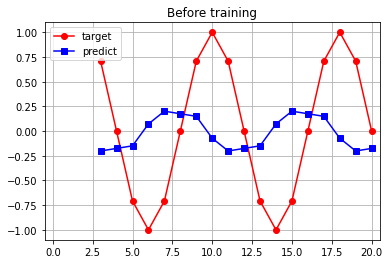

In [35]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label='predict')
plt.xlim(-0.5, 20.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('Before training')
plt.show()

- 모델 학습

In [36]:
hist = model.fit(X_train, y_train, epochs=100, verbose=0)

- 학습결과 확인

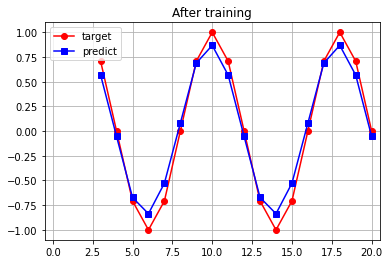

In [37]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label='predict')
plt.xlim(-0.5, 20.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('After training')
plt.show()

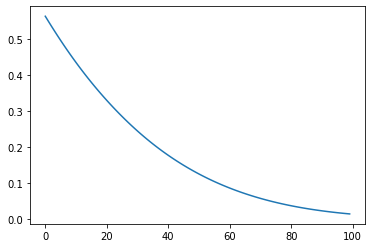

In [38]:
plt.plot(hist.history['loss'])
plt.show()      # mse값이 계속 줄어드는 모양